In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

In [76]:
iris = load_iris()

In [77]:
df = sns.load_dataset('iris')

In [78]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [79]:
species = pd.unique(df.loc[:, 'species'])
species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [80]:
X = df.iloc[:,:-1]
y = iris.target
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [81]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.30, random_state=42)

In [82]:
# postpruning technique    -     Removing some branches from the model to minize overfitting
treemodel = DecisionTreeClassifier()

In [83]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.6, 0.8333333333333334, 'x[3] <= 1.55\ngini = 0.648\nsamples = 45\nvalue = [10, 17, 18]'),
 Text(0.4, 0.5, 'x[3] <= 0.7\ngini = 0.466\nsamples = 27\nvalue = [10, 17, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 17\nvalue = [0, 17, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 18]')]

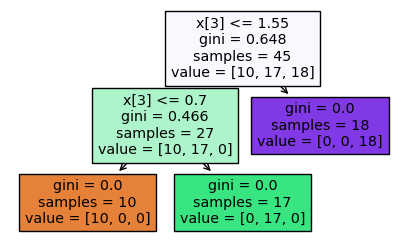

In [84]:
plt.figure(figsize = (5,3))
tree.plot_tree(treemodel,filled=True)    #[0,0,18] which is a leaf node indicates that node is cleary verginica(['setosa', 'versicolor', 'virginica'])

In [85]:
treemodel_pred = treemodel.predict(X_train)
treemodel_pred

array([0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2,
       2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1,
       2])

In [86]:
score = accuracy_score(treemodel_pred,y_train)
print(score)

1.0
